### Step 1: Input Values ###
Pain Intensity: 7
Heart Rate: 120
Temperature: 39

### Step 2: Fuzzification Values ###
Pain Intensity (Low): 0.00, Pain Intensity (High): 0.50
Heart Rate (Normal): 0.00, Heart Rate (Elevated): 0.50
Temperature (Normal): 0.00, Temperature (High): 0.45

### Step 3: Defuzzified Severity Score ###
Calculated Severity Score: 8.06


/Users/nicolasliebau/.virtualenvs/DS-MMS/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


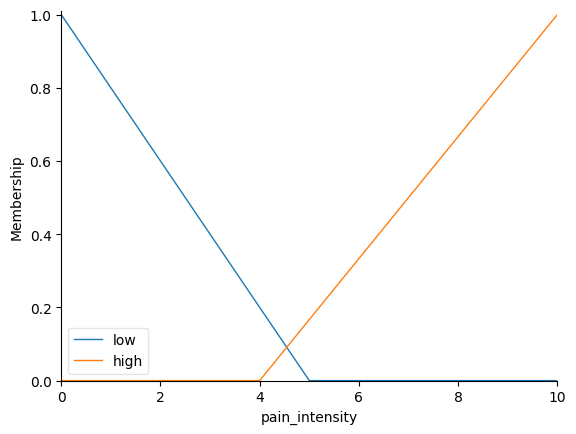

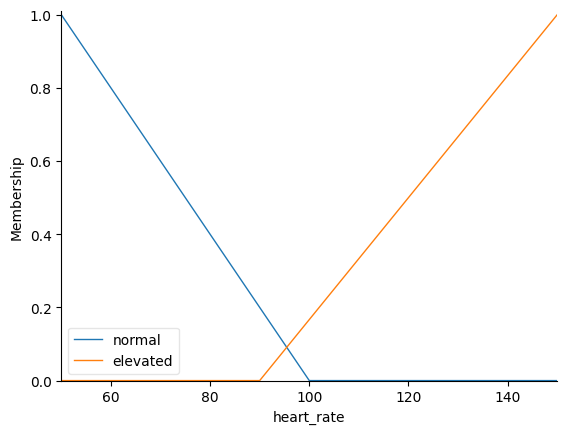

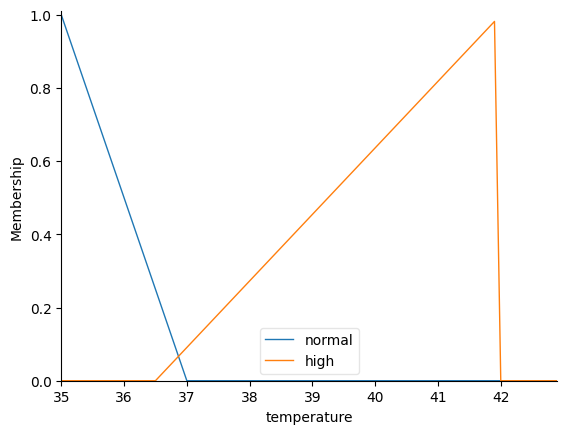

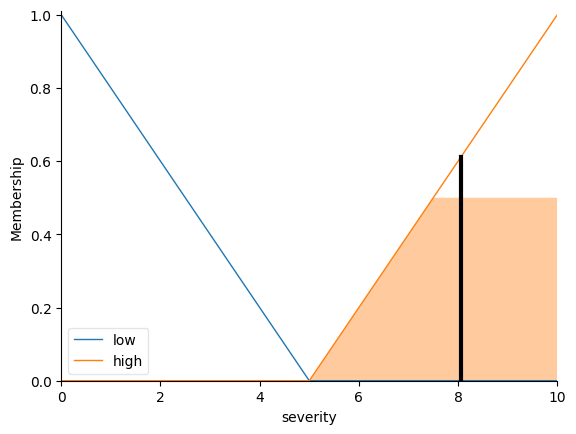

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
pain_intensity = ctrl.Antecedent(np.arange(0, 11, 1), 'pain_intensity')
heart_rate = ctrl.Antecedent(np.arange(50, 151, 1), 'heart_rate')
temperature = ctrl.Antecedent(np.arange(35, 43, 0.1), 'temperature')
severity = ctrl.Consequent(np.arange(0, 11, 1), 'severity')

# Define fuzzy membership functions for Pain Intensity
pain_intensity['low'] = fuzz.trimf(pain_intensity.universe, [0, 0, 5])
pain_intensity['high'] = fuzz.trimf(pain_intensity.universe, [4, 10, 10])

# Define fuzzy membership functions for Heart Rate
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [50, 50, 100])
heart_rate['elevated'] = fuzz.trimf(heart_rate.universe, [90, 150, 150])

# Define fuzzy membership functions for Temperature
temperature['normal'] = fuzz.trimf(temperature.universe, [35, 35, 37])
temperature['high'] = fuzz.trimf(temperature.universe, [36.5, 42, 42])

# Define fuzzy membership functions for Severity Level
severity['low'] = fuzz.trimf(severity.universe, [0, 0, 5])
severity['high'] = fuzz.trimf(severity.universe, [5, 10, 10])

# Define rules
rule1 = ctrl.Rule(pain_intensity['high'] & heart_rate['elevated'] & temperature['high'], severity['high'])
rule2 = ctrl.Rule(pain_intensity['low'] & heart_rate['normal'] & temperature['normal'], severity['low'])
rule3 = ctrl.Rule(pain_intensity['high'] & heart_rate['elevated'], severity['high'])
rule4 = ctrl.Rule(pain_intensity['low'] & temperature['high'], severity['low'])
rule5 = ctrl.Rule(heart_rate['elevated'] & temperature['high'], severity['high'])

# Create the control system and simulation
severity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
severity_simulation = ctrl.ControlSystemSimulation(severity_ctrl)

# Set the inputs and show exact values
input_values = {
    'pain_intensity': 7,
    'heart_rate': 120,
    'temperature': 39
}
severity_simulation.input['pain_intensity'] = input_values['pain_intensity']
severity_simulation.input['heart_rate'] = input_values['heart_rate']
severity_simulation.input['temperature'] = input_values['temperature']

print("### Step 1: Input Values ###")
print(f"Pain Intensity: {input_values['pain_intensity']}")
print(f"Heart Rate: {input_values['heart_rate']}")
print(f"Temperature: {input_values['temperature']}")

# Fuzzify input values
pain_membership_low = fuzz.interp_membership(pain_intensity.universe, pain_intensity['low'].mf, input_values['pain_intensity'])
pain_membership_high = fuzz.interp_membership(pain_intensity.universe, pain_intensity['high'].mf, input_values['pain_intensity'])

hr_membership_normal = fuzz.interp_membership(heart_rate.universe, heart_rate['normal'].mf, input_values['heart_rate'])
hr_membership_elevated = fuzz.interp_membership(heart_rate.universe, heart_rate['elevated'].mf, input_values['heart_rate'])

temp_membership_normal = fuzz.interp_membership(temperature.universe, temperature['normal'].mf, input_values['temperature'])
temp_membership_high = fuzz.interp_membership(temperature.universe, temperature['high'].mf, input_values['temperature'])

print("\n### Step 2: Fuzzification Values ###")
print(f"Pain Intensity (Low): {pain_membership_low:.2f}, Pain Intensity (High): {pain_membership_high:.2f}")
print(f"Heart Rate (Normal): {hr_membership_normal:.2f}, Heart Rate (Elevated): {hr_membership_elevated:.2f}")
print(f"Temperature (Normal): {temp_membership_normal:.2f}, Temperature (High): {temp_membership_high:.2f}")

# Compute the result
severity_simulation.compute()

# Display the severity score
calculated_severity_score = severity_simulation.output['severity']
print("\n### Step 3: Defuzzified Severity Score ###")
print(f"Calculated Severity Score: {calculated_severity_score:.2f}")

# Visualize the result
pain_intensity.view()
heart_rate.view()
temperature.view()
severity.view(sim=severity_simulation)